# About the Jupyter Notebook
In this Jupyter Notebook we are going to look at the accuracy of the neural network designed to classify handwritten digits. We are going to plot the accuracy of the network in relation small changes in all major hyper parameters such as number of epochs, mini batch size and learning rate.

## Representaion of the Network
The network is going to be represented as something simmilar to: a_784.96.48.10_5_25_0.08_e

Here the 'a' stands for accuracy, '784.96.48.10' tells us the number of neurons per layer, '10_5_25_0.08' tells us the number of epochs,
mini back size, and learning grade respectively and 'e' at the end stands for the hyper parameter that was changing (epochs in this case).

# Importing the Trained Networks
First, we are going to import all the networks that were trained in trained_networks.py.


In [1]:
import pickle
import data_loader

with open("model_parameters.pkl", "rb") as file:
    loaded_parameters = pickle.load(file)

## Accuracy of the Network With Three Layers
Here we are experimenting with a neural network that has three layers. We are varying the amount of neurons per layer to see how that impacts the overall accuracy. Generally it is not always better to have more parameters in the neural network. It depends on how much training data you have. With this and the next section we will try to find out what the optimal number of layers and the optimal number of neurons per layer is for best performance. 

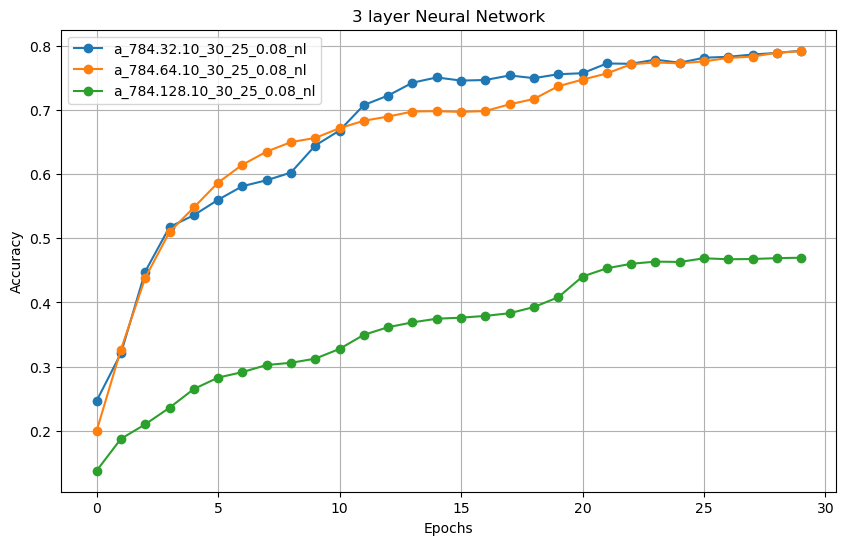

The training took 14 minutes and 43.0 seconds.


In [2]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.32.10_30_25_0.08_nl', 'a_784.64.10_30_25_0.08_nl', 
                                   'a_784.128.10_30_25_0.08_nl'], '3 layer Neural Network')

## Accuracy of the Network With Four Layers
Here we are experimenting with the neural network that has four layers. We are varying the amount of neurons in the two hidden layers. As the number of parameters is quite high relative to the number of training samples, we will not be experimenting with any neural networks that have five layers or more.

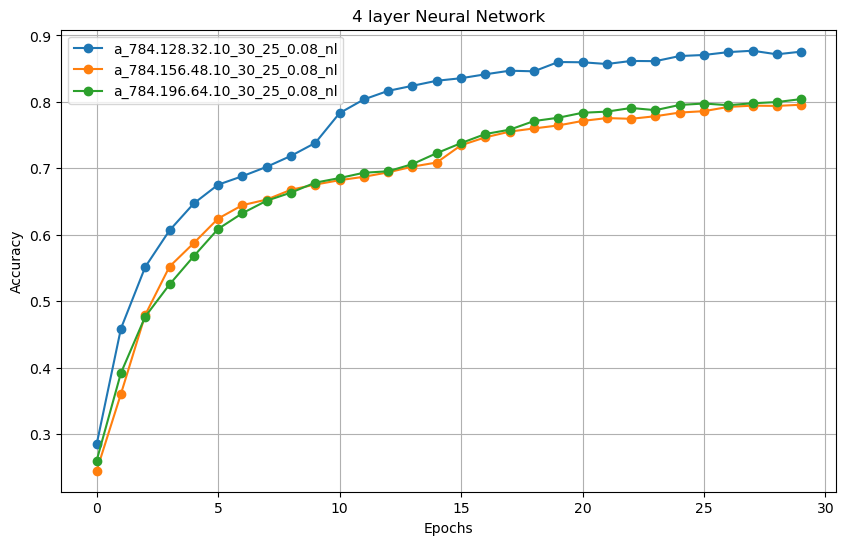

The training took 26 minutes and 40.38 seconds.


In [3]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.128.32.10_30_25_0.08_nl', 'a_784.156.48.10_30_25_0.08_nl', 
                                   'a_784.196.64.10_30_25_0.08_nl'], '4 layer Neural Network')

## Accuracy of the Network Based on the Number of Epochs
Here we will observe how the accuracy of the network changes when we vary the number of epochs. We would expect the network to learn quickly in the beginning, and for all the graphs to look the same. The only problem we could encounter here is with overfitting. That would result in the accuracy decreasing, but in my opinion, the number of epochs would have to be larger than 50.

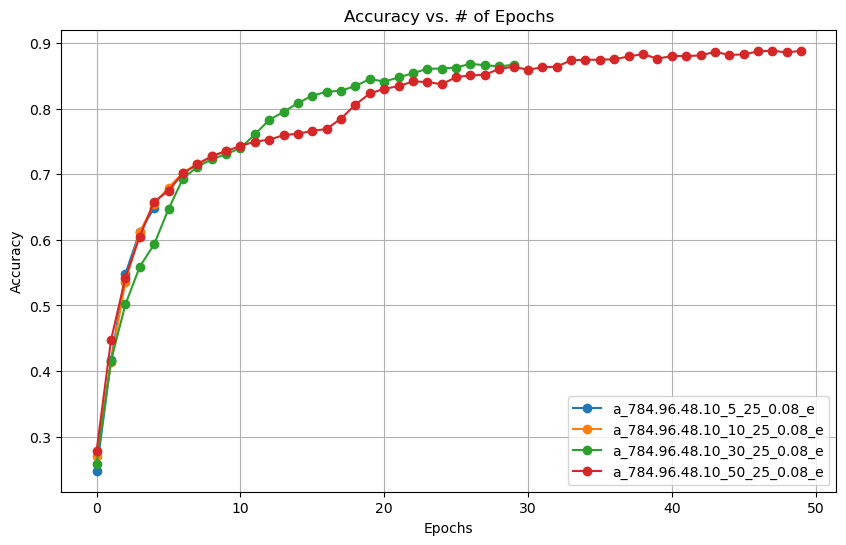

The training took 21 minutes and 48.12 seconds.


In [4]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_5_25_0.08_e', 'a_784.96.48.10_10_25_0.08_e', 
                                   'a_784.96.48.10_30_25_0.08_e', 'a_784.96.48.10_50_25_0.08_e'], 
                                   'Accuracy vs. # of Epochs')

## Accuracy of the Network Based on Mini Batch Size
Here we will observe how the accuracy, the network changes when we vary the size of mini batches. If the batches are too small the network will be very inefficient in minimizing the cost function. In some cases, the size batch size of one might be a good fit for the model, but in this case, it resolves in the network being unable to learn. On the other side, if the batches are too big, the network is going to learn slowly.

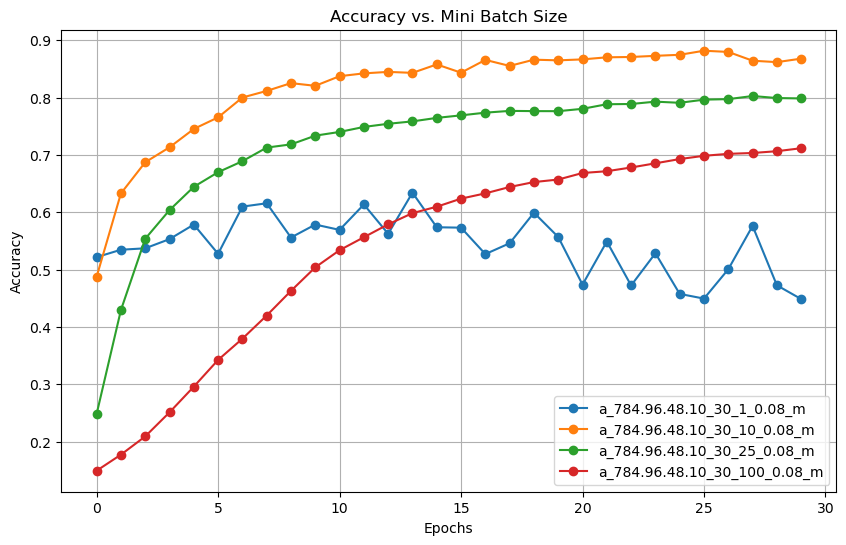

The training took 13 minutes and 38.88 seconds.


In [5]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_30_1_0.08_m', 'a_784.96.48.10_30_10_0.08_m', 
                                   'a_784.96.48.10_30_25_0.08_m', 'a_784.96.48.10_30_100_0.08_m'], 
                                   'Accuracy vs. Mini Batch Size')

## Accuracy of the Network Based on Learning Rate
Here we will observe how the accuracy of the network changes when we vary the learning rate. If the learning rate is too big, the corrections that the network makes to the weights and biases after a step of gradient descent are too large and we don't expect the network to become very efficient. On the other hand, if the learning rate is too small, the network learns too slowly. If you wanted to make the neural netwrok very effecient, you would have a bigger learning rate in the beginning and then make it smaller to fine tune the network.

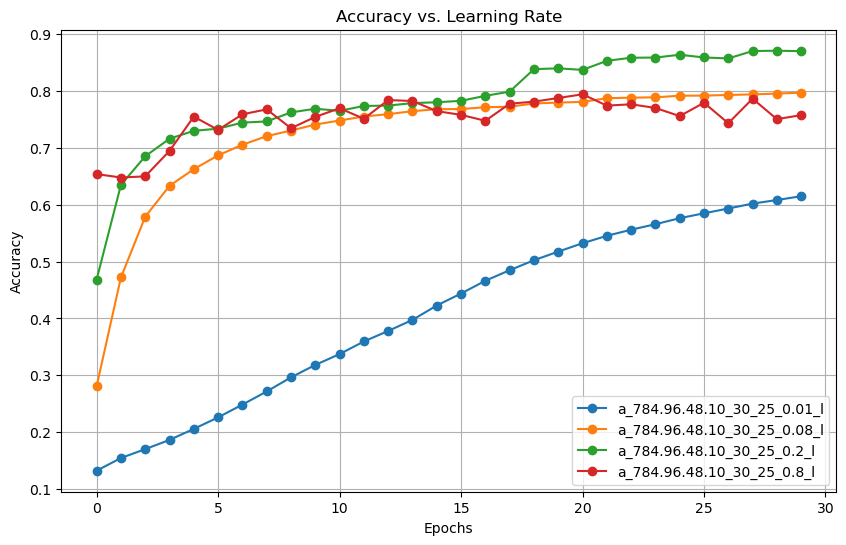

The training took 16 minutes and 49.64 seconds.


In [6]:
data_loader.create_plot_from_data(loaded_parameters, 
                                  ['a_784.96.48.10_30_25_0.01_l', 'a_784.96.48.10_30_25_0.08_l', 
                                   'a_784.96.48.10_30_25_0.2_l', 'a_784.96.48.10_30_25_0.8_l'],
                                   'Accuracy vs. Learning Rate')

# Imported Image Guessing
At this point, I took the combination that gave the highest accuracy in each of the categories Inch trained and fine tuned a new network that has high accuracy.

The reader can add images of hand drawn digits into the input_images folder (if it doesn't exist crate one with that name in the same folder that the data_loader.py file is). Make sure the image is either JPEG or PNG format, and that the digit does not appear too small in the image. The network is done going to guess what the digit is.

In [ ]:
from network import Network
import matplotlib.pyplot as plt
import numpy as np

network = Network([784, 10])
network.weights = loaded_parameters['W_784.96.48.10_50_25_0.08_e']
network.biases = loaded_parameters['b_784.96.48.10_50_25_0.08_e']
network.accuracy = loaded_parameters['a_784.96.48.10_50_25_0.08_e']
images = data_loader.read_test_data()

for image in images:
    guess = np.argmax(network.feedforward(image))
    image.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    print(f'The network\'s guess for the image is {guess}')